# Exercício - Introdução a Deep Learning com TensorFlow

![Logo de capa](Exercicio-TensowFlow-Logo.png)

Estudante: Leonardo Simões

---
## Sumário
- [1.Introdução](#introduction)
- [2.Objetivos](#objectives)
- [3.Desenvolvimento](#development)
    * [3.1.Aquisição dos Dados](#data_load)
    * [3.2.Pré-Processamento do Dados](#pre_processing)
    * [3.3.Treinamento do Modelo](#model_training)
    * [3.4 Avaliação do Modelo](#model_evaluate)
    * [3.5 Deploy do Modelo](#model_deploy)
- [4.Conclusão](#conclusion)
- [Referências](#references)

---
<a id='introduction'></a>
## 1. Introdução

O Problema de Negócio tratado no exercício é:

* Construir um modelo de Inteligência Artificial capaz de classificar imagens considerando 10 categorias: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'].
* Dada uma nova imagem de uma dessas categorias o modelo deve ser capaz de classificar e indicar o que é a imagem.

---
<a id='objectives'></a>
## 2. Objetivos

Os objetivos do projeto são:
- Executar o exemplo fornecido.
- Refatorar o código fornecido.
- Testar o modelo com uma imagem diferente.
- Praticar o uso de TensorFlow.

---
<a id='development'></a>
## 3. Desenvolvimento

In [1]:
# Verificação da versão do Python
from platform import python_version
print('Versão do Python: ', python_version())

Versão do Python:  3.11.2


In [2]:
# Imports das bibliotecas mais usadas
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from PIL import Image

In [4]:
# suppress warnings from final output
# Oculta alguns alertas
import warnings
warnings.simplefilter("ignore")

In [5]:
# Silencia mensagens do TF
%env TF_CPP_MIN_LOG_LEVEL=3

env: TF_CPP_MIN_LOG_LEVEL=3


In [6]:
# Alterar a exibição de float para duas casas decimais
#pd.options.display.float_format = '{:20,.2f}'.format
pd.options.display.float_format = '{:.4f}'.format
# pd.set_option("precision", 2)
#np.set_printoptions(precision=2)

In [7]:
# Versões das bibliotecas usadas
print('Numpy versão ' + np.__version__)
print('Pandas versão ' + pd.__version__)
print('Matplotlib versão ' + mpl.__version__)
print('TensorFlow versão ' + tf.__version__)

Numpy versão 1.23.5
Pandas versão 2.0.0
Matplotlib versão 3.7.1
TensorFlow versão 2.12.0


<a id='data_load'></a>
### 3.1 Aquisição dos Dados



In [8]:
# Carrega o dataset CIFAR-10
(imagens_treino, labels_treino), (imagens_teste, labels_teste) = datasets.cifar10.load_data()

In [9]:
# Exibe as dimensões dos dados
print('Dimensões de Imagens de Treino:', imagens_treino.shape)
print('Dimensões de Label de Treino:', labels_treino.shape)
print('Dimensões de Imagens de Teste:', imagens_teste.shape)
print('Dimensões de Labels de Teste:', labels_teste.shape)

Dimensões de Imagens de Treino: (50000, 32, 32, 3)
Dimensões de Label de Treino: (50000, 1)
Dimensões de Imagens de Teste: (10000, 32, 32, 3)
Dimensões de Labels de Teste: (10000, 1)


In [10]:
# Valor das classes (labels)
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [11]:
# Tradução para o valor das classes (labels)
traducao_classes = {'airplane': 'avião' , 'automobile': 'automóvel', 'bird': 'pássaro', 'cat':'gato', 'deer': 'veado',
                   'dog': 'cão', 'frog': 'sapo', 'horse': 'cavalo', 'ship': 'navio', 'truck': 'caminhão'}

<a id='pre_processing'></a>
### 3.2 Pré-Processamento do Dados

In [13]:
# Constante para normalizar pixels
VALOR_NORMALIZACAO_PIXEL = 255.0

In [14]:
# Normaliza os valores dos pixels para que os dados fiquem na mesma escala
imagens_treino = imagens_treino / VALOR_NORMALIZACAO_PIXEL
imagens_teste = imagens_teste / VALOR_NORMALIZACAO_PIXEL

In [15]:
# Função para exibir as imagens e labels
def visualizar_imagens_labels(imagens, labels, classes):
    plt.figure(figsize = (10,10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(imagens[i], cmap = plt.cm.binary)
        plt.xlabel(classes[labels[i][0]])
    plt.show()

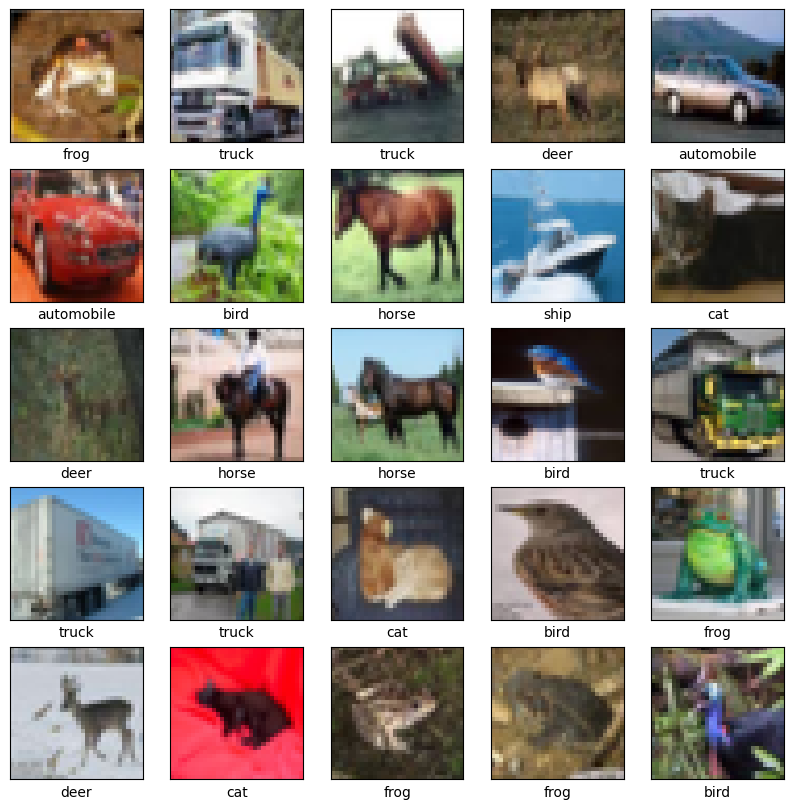

In [61]:
# Exibe as imagens e labels de treino
visualizar_imagens_labels(imagens_treino, labels_treino, classes)

<a id='model_training'></a>
### 3.3 Treinamento do Modelo

O modelo de Rede Neural utilizado deve seguir a seguinte arquitetura:

![Modelo-Da-Rede-Neural](ModeloDaRedeNeural.jpg)

In [17]:
# Extrair as dimensões das imagens
assert imagens_treino.shape[1:] == imagens_teste.shape[1:]
DIMENSAO_IMAGEM = imagens_treino.shape[1:]
DIMENSAO_IMAGEM

(32, 32, 3)

In [19]:
# Constantes para parâmetros das funções do modelo
CONV2D_FILTERS_1 = 32
CONV2D_FILTERS_2 = 64
CONV2D_KERNEL_SIZE = (3, 3)
POOL_SIZE = (2, 2)
DENSE_UNITS_1 = 64
DENSE_UNITS_2 = 10

In [20]:
# Cria o modelo sequencial de camadas
modelo = models.Sequential()

In [21]:
# Camada de Entrada - Primeiro bloco de convolução e max pooling
modelo.add(layers.Conv2D(CONV2D_FILTERS_1, CONV2D_KERNEL_SIZE, activation='relu', input_shape=DIMENSAO_IMAGEM))
modelo.add(layers.MaxPooling2D(POOL_SIZE))

In [22]:
# Camada intermediária - Segundo bloco de convolução e max pooling
modelo.add(layers.Conv2D(CONV2D_FILTERS_2, CONV2D_KERNEL_SIZE, activation='relu'))
modelo.add(layers.MaxPooling2D(POOL_SIZE))

In [23]:
# Camada intermediária - Terceiro bloco de convolução e max pooling
modelo.add(layers.Conv2D(CONV2D_FILTERS_2, CONV2D_KERNEL_SIZE, activation='relu'))
modelo.add(layers.MaxPooling2D(POOL_SIZE))

In [24]:
# Camadas de classificação
modelo.add(layers.Flatten())
modelo.add(layers.Dense(DENSE_UNITS_1, activation='relu'))
modelo.add(layers.Dense(DENSE_UNITS_2, activation='softmax'))

In [25]:
# Informações sobre o modelo
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

In [26]:
# Compilação do modelo
modelo.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])

In [62]:
# Treinamento do modelo
historico = modelo.fit(imagens_treino,
                       labels_treino,
                       epochs = 10,
                       validation_data = (imagens_teste, labels_teste))

UsageError: Line magic function `%%time` not found.


<a id='model_evaluate'></a>
### 3.4 Avaliação do Modelo

In [31]:
# Obtém métricas do modelo
erro_teste, acc_teste = modelo.evaluate(imagens_teste, labels_teste, verbose = 2)

313/313 - 5s - loss: 0.9509 - accuracy: 0.6760 - 5s/epoch - 15ms/step


In [40]:
# Exibe métricas do modelo
print('Acurácia do Modelo com Dados de Teste foi de ', round(acc_teste*100, 2), '%')

Acurácia do Modelo com Dados de Teste: 67.6 %


<a id='model_deploy'></a>
### 3.5 Deploy do Modelo

In [42]:
# Carrega imagem a partir de um arquivo
imagem_caminhao = Image.open('Caminhao_Optimus_Prime.png')

In [54]:
# Função para visualizar uma imagem
def visualizar_imagem(imagem, dimensao=DIMENSAO_IMAGEM[:2]):
    plt.figure(figsize = dimensao)
    plt.imshow(imagem)
    plt.xticks([])
    plt.yticks([])
    plt.show()

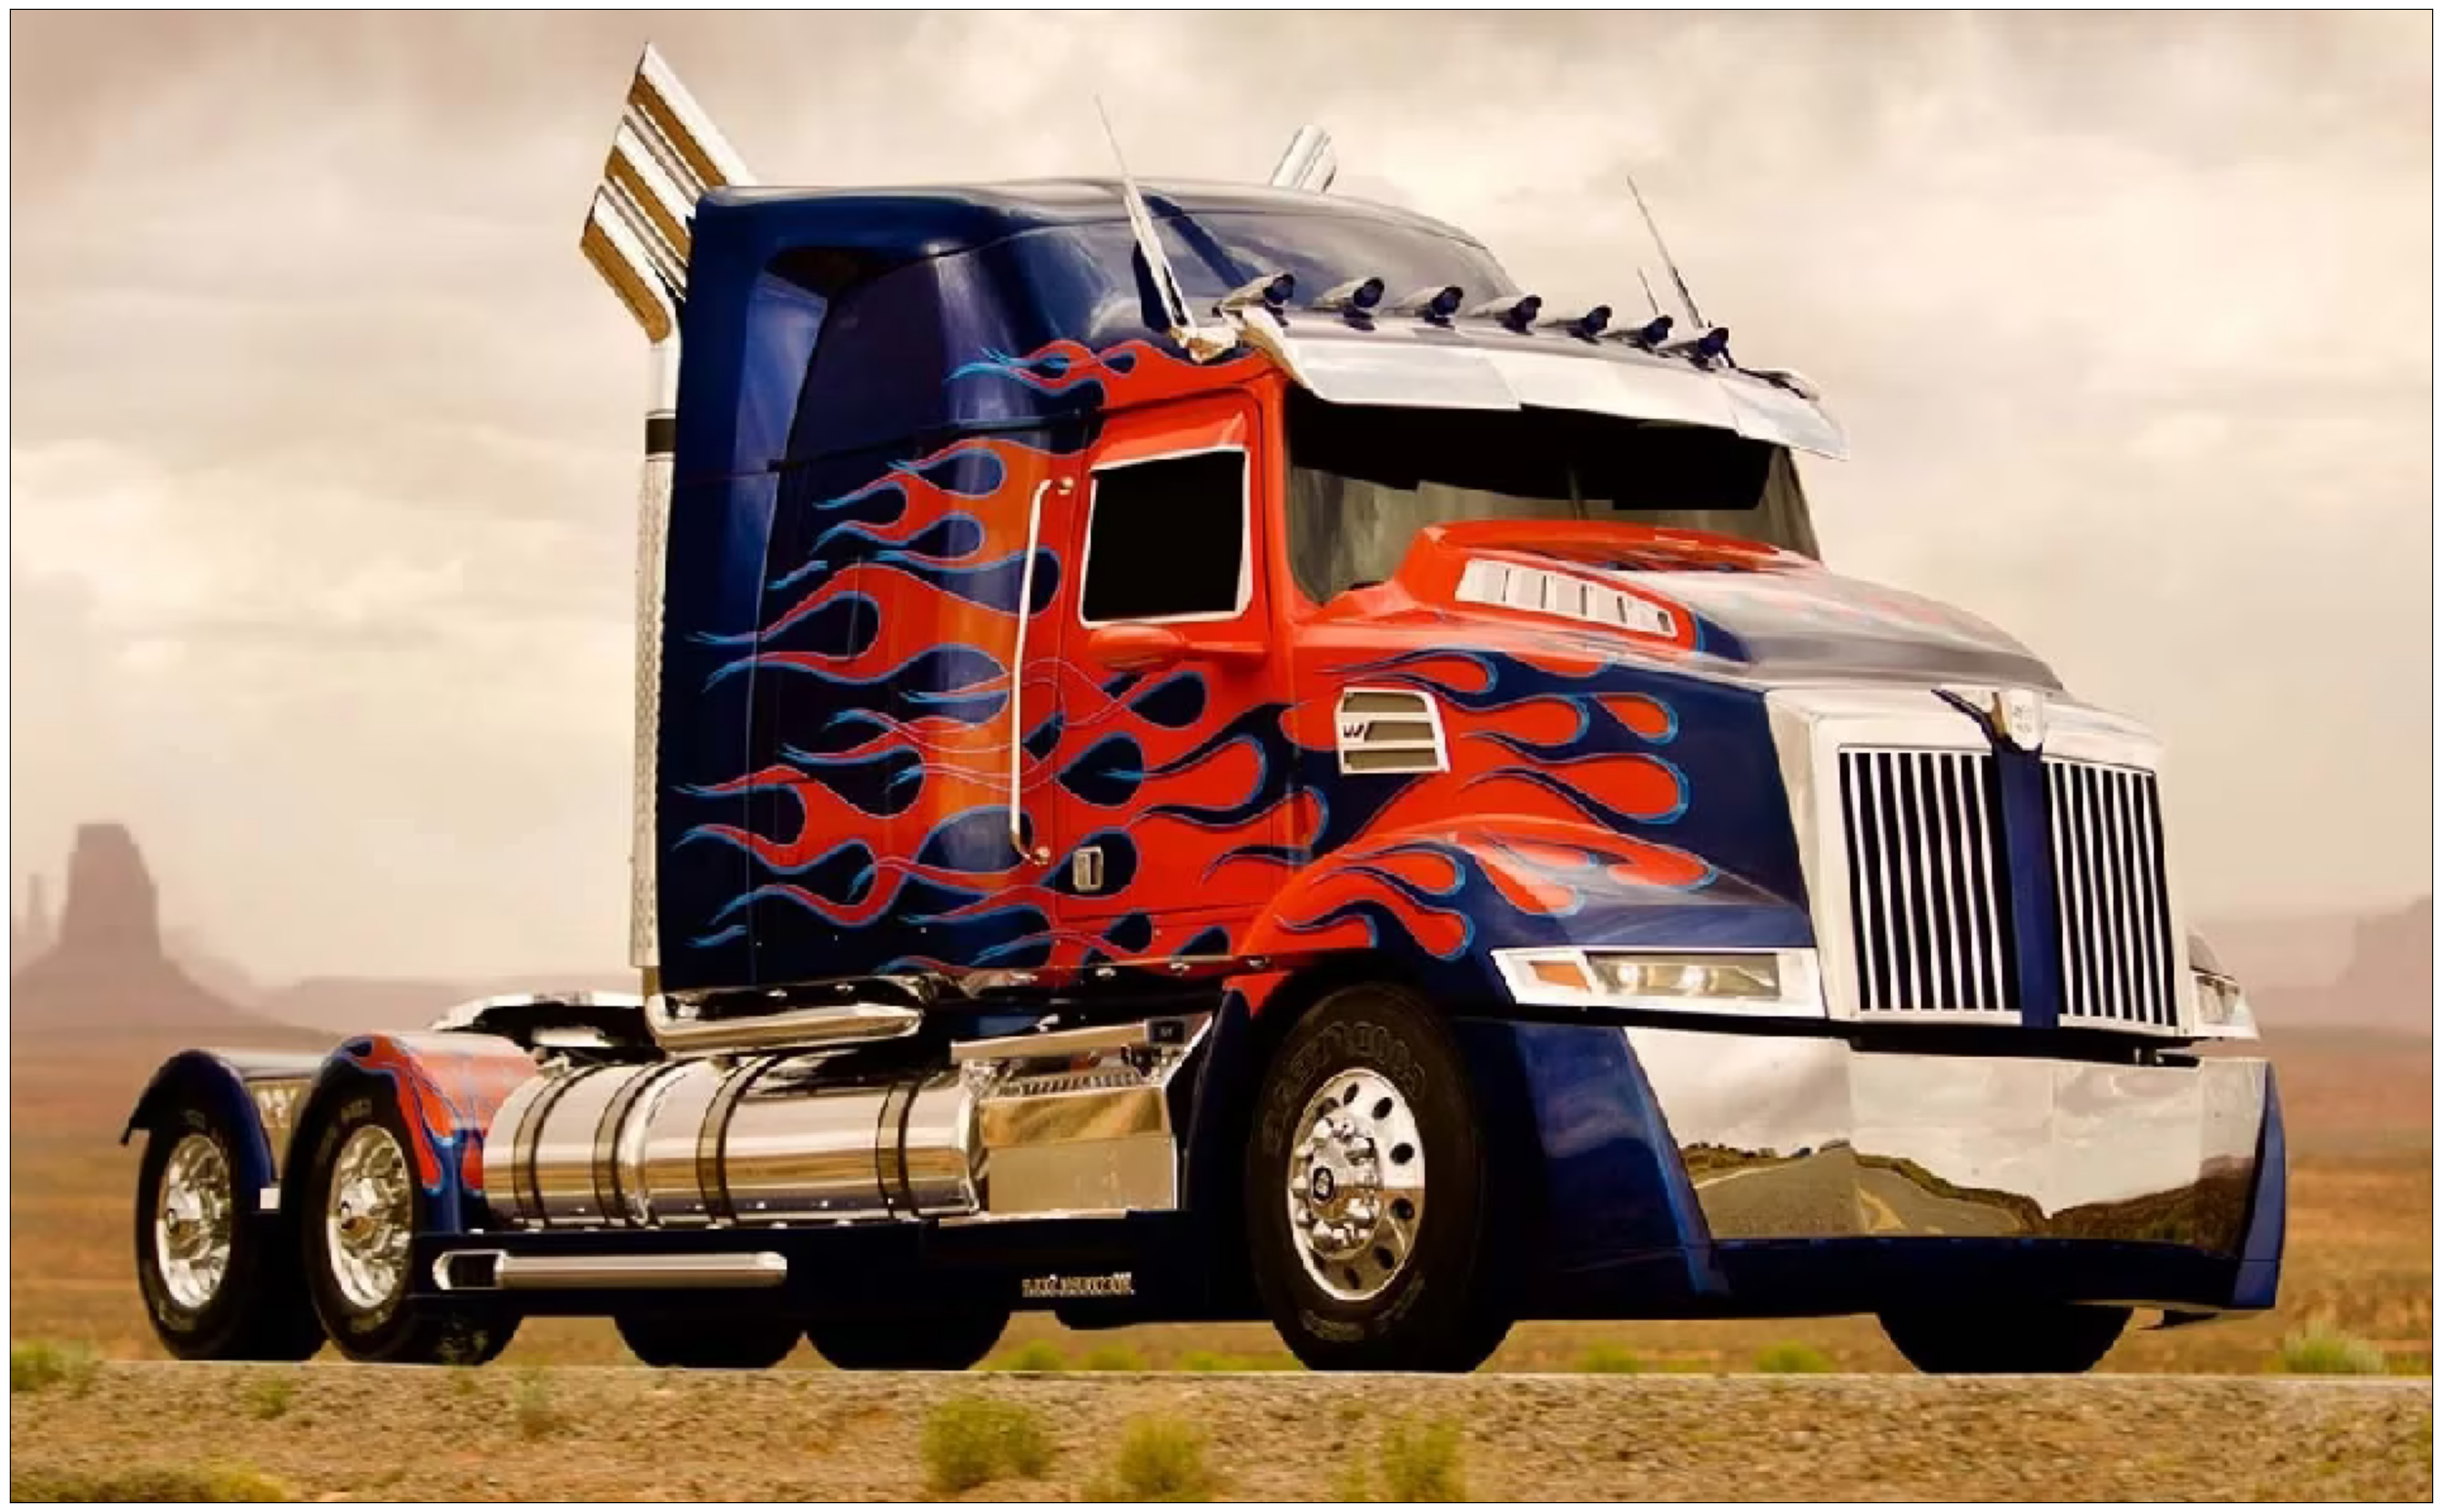

In [55]:
# Visualiza a imagem carregada
visualizar_imagem(imagem_caminhao)

In [52]:
# Função para redimensionar uma imagem para uso no modelo
def redimensionar_imagem(imagem, dimensao=DIMENSAO_IMAGEM[:2], normalizacao=VALOR_NORMALIZACAO_PIXEL):
    imagem = imagem.resize(dimensao)
    imagem_array = np.array(imagem) / normalizacao
    imagem_array = np.expand_dims(imagem_array, axis = 0)
    return imagem_array

In [53]:
# Redimensiona a imagem carregada
imagem_caminhao_array = redimensionar_imagem(imagem_caminhao)

In [59]:
# Predição para uma imagem não treinada
predicao = modelo.predict(imagem_caminhao_array);

1/1 [==============================] - 0s 47ms/step


In [60]:
# Exibição dos resultados da predição
classe_prevista = np.argmax(predicao)
nome_classe_prevista = classes[classe_prevista]
nome_classe_prevista_ptbr = traducao_classes[nome_classe_prevista]
print(f'A imagem foi classificada como: {nome_classe_prevista} ({nome_classe_prevista_ptbr}).' )

A imagem foi classificada como: truck (caminhão).


---
<a id='conclusion'></a>
## 4. Conclusão

O treinamento do modelo foi relativamente simples, uma vez que foi fornecida a arquitetura da rede neural. O TensorFlow se mostrou eficiente como ferramenta de machine learning (deep learning) para este projeto acadêmico.

---
<a id='references'></a>
## Referências

Data Science Academy - Fundamentos de Linguagem Python Para Análise de Dados e Data Science:
https://www.datascienceacademy.com.br/course/fundamentos-de-linguagem-python-para-analise-de-dados-e-data-science ,
Acessado em 06/05/2023.